In [1]:
# This file contains functions to plot results.
import re
import matplotlib
import matplotlib.pyplot as plt
import networkx as nx
import ast
import numpy as np
import os
import pandas as pd
import seaborn as sns

pd.set_option("display.max_rows", None, "display.max_columns", None, 'display.max_colwidth', None)


In [2]:
# for plotting local region:
# length = 4
# width = 5
# test_size = 0.5
# shadow_size = 1000
# data_name = 'new'
# d = 1
# plot_local_region(length, width, test_size, shadow_size, data_name, d)


# for plotting prediction error:
sns.set(style="ticks")
df = pd.read_excel('./../clean_results/clean_results300/results_all.xlsx', index_col=0)

In [3]:
df.algo_setting.unique()

array(['new_algorithm_celer_maxiter=10000_maxep=50000_tol=0.0001',
       'new_algorithm_sklearn_maxiter=100000_tol=0.0001',
       'orig_algorithm_svrtol=0.0001_ntk-norm=True_diri-inclx=True_diri-sf=4',
       'orig_algorithm_svrtol=0.001_ntk-norm=True_diri-inclx=True_diri-sf=6',
       'orig_algorithm_svrtol=0.001_ntk-norm=True_diri-inclx=True_diri-sf=4',
       'orig_algorithm_svrtol=0.0001_ntk-norm=True_diri-inclx=False_diri-sf=5',
       'new_algorithm_celer_maxiter=10000_maxep=50000_tol=0.001',
       'new_algorithm_sklearn_maxiter=10000_tol=0.001',
       'orig_algorithm_svrtol=0.001_ntk-norm=True_diri-inclx=False_diri-sf=5',
       'orig_algorithm_svrtol=0.0001_ntk-norm=True_diri-inclx=True_diri-sf=6',
       'new_algorithm_sklearn_maxiter=10000_tol=0.0001',
       'new_algorithm_celer_maxiter=50000_maxep=50000_tol=0.0001'],
      dtype=object)

In [4]:
# select only one new algo folder and one old algo folder
selection = [
    # for clean_results300, one new and one orig algorithm folder
    'new_algorithm_celer_maxiter=10000_maxep=50000_tol=0.001',
    'orig_algorithm_svrtol=0.0001_ntk-norm=True_diri-inclx=True_diri-sf=4',
    
    # for clean_results500, one new and one orig algorithm folder
#     'new_algorithm_celer_maxiter=10000_maxep=50000_tol=0.01',
#     'orig_algorithm_svrtol=0.0001_ntk-norm=True_diri-inclx=True_diri-sf=4',
]
df = df[df['algo_setting'].isin(selection)]

In [5]:
df.columns

Index(['lassolib', 'maxiter', 'maxep', 'tol', 'testsize', 'shadowsize',
       'qubitdist', 'nrow', 'ncol', 'dataname', 'path', 'algo', 'algo_setting',
       'srvtol', 'ntknorm', 'dirinclx', 'dirsf', 'nedges', 'edges',
       'best_cv_score_new', 'test_score_new', 'best_cv_score_dirichlet',
       'test_score_dirichlet', 'best_cv_score_gauss', 'test_score_gauss',
       'best_cv_score_ntk2', 'test_score_ntk2', 'best_cv_score_ntk3',
       'test_score_ntk3', 'best_cv_score_ntk4', 'test_score_ntk4',
       'best_cv_score_ntk5', 'test_score_ntk5', 'nsamples', 'avg_train_new',
       'avg_test_new', 'avg_train_dirichlet', 'avg_test_dirichlet',
       'avg_train_gauss', 'avg_test_gauss', 'avg_train_ntk2', 'avg_test_ntk2',
       'avg_train_ntk3', 'avg_test_ntk3', 'avg_train_ntk4', 'avg_test_ntk4',
       'avg_train_ntk5', 'avg_test_ntk5', 'avg_test_orig', 'avg_train_orig'],
      dtype='object')

In [6]:
%pdb off
# drop additional metrics 
df = df.drop(columns=[c for c in df.columns if 'best' in c])
df = df.drop(columns=[c for c in df.columns if 'test_score' in c])
df = df.drop(columns=[c for c in df.columns if 'avg_train' in c])


# drop columns which dont vary of if there are two values and one of them is nan then also drop
# this is the case for parameters columns of orig-algo which dont vary or 
# parameter columns of new-algo  which dont vary
todrop = ['edges', 'path', 'nedges', 'algo_setting']
for c in df.columns:
    try:
        if len(df[c].unique()) == 1:
            todrop.append(c)
        elif len(df[c].unique()) == 2:
            # and one is nan , then also delete
            if pd.isnull(df[c].unique()).any():
                todrop.append(c)
    except:
        continue
df2 = df.drop(columns=todrop)

Automatic pdb calling has been turned OFF


In [7]:
df2.columns

Index(['testsize', 'shadowsize', 'qubitdist', 'nrow', 'dataname', 'algo',
       'nsamples', 'avg_test_new', 'avg_test_dirichlet', 'avg_test_gauss',
       'avg_test_ntk2', 'avg_test_ntk3', 'avg_test_ntk4', 'avg_test_ntk5',
       'avg_test_orig'],
      dtype='object')

In [8]:
display(df2.shape)
df2.head()

(1800, 15)

,testsize,shadowsize,qubitdist,nrow,dataname,algo,nsamples,avg_test_new,avg_test_dirichlet,avg_test_gauss,avg_test_ntk2,avg_test_ntk3,avg_test_ntk4,avg_test_ntk5,avg_test_orig
1800,0.9,100,1,4,new,orig,450.0,NaN,0.201707,0.182054,0.199235,0.199155,0.199150,0.199192,0.182054
1801,0.9,100,1,4,orig,orig,90.0,NaN,0.221382,0.213704,0.216107,0.216003,0.215829,0.215832,0.213704
1802,0.9,100,1,8,new,orig,450.0,NaN,0.200050,0.189022,0.197307,0.197275,0.197255,0.197204,0.189022
1803,0.9,100,1,9,new,orig,450.0,NaN,0.195824,0.186331,0.192449,0.192415,0.192383,0.192396,0.186331
1804,0.9,100,1,9,orig,orig,80.1,NaN,0.215406,0.212847,0.214968,0.214954,0.214986,0.214994,0.212847


In [9]:
# we need to handle the orig-algo rows differently since they contain the entries for columns 
# avg_test_dirichlet 	avg_test_gauss 	avg_test_ntk2 	avg_test_ntk3 	avg_test_ntk4 	avg_test_ntk5 	avg_test_orig
# avg_test_orig is min of [avg_test_dirichlet,avg_test_gauss,avg_test_ntk2,avg_test_ntk3,avg_test_ntk4,avg_test_ntk5]
df_orig = df2[df2['algo'] == 'orig']
df_orig = df_orig.dropna(axis=1) # drop avg_test_bew col

# the new alogs only have entries in the col avg_test_new
df_new = df2[df2['algo'] == 'new']
df_new = df_new.dropna(axis=1) # drop other metric cols

In [10]:
# convert table format
# instead of storing metrics in each col seperately we merge them into one "avg_test" col 
# and add a second col which indicates the method: dirichlet/gauss/ntk2,3,4,5
df_orig2 = pd.wide_to_long(df_orig, stubnames=['avg_test_'], i=['testsize', 'shadowsize', 'qubitdist', 'nrow', 'dataname', 'nsamples'], j='method', suffix=".+")
df_orig2 = df_orig2.rename({'avg_test_':'avg_test'}, axis=1)
df_orig2 = df_orig2.reset_index()

display(df_orig2.head())

df_new2 = df_new.rename({'avg_test_new':'avg_test'}, axis=1)
df_new2['method'] = 'new'
display(df_new2.head())

,testsize,shadowsize,qubitdist,nrow,dataname,nsamples,method,algo,avg_test
0,0.9,100,1,4,new,450.0,dirichlet,orig,0.201707
1,0.9,100,1,4,new,450.0,gauss,orig,0.182054
2,0.9,100,1,4,new,450.0,ntk2,orig,0.199235
3,0.9,100,1,4,new,450.0,ntk3,orig,0.199155
4,0.9,100,1,4,new,450.0,ntk4,orig,0.199150


,testsize,shadowsize,qubitdist,nrow,dataname,algo,nsamples,avg_test,method
5400,0.9,100,1,4,new,new,450.0,0.166530,new
5401,0.9,100,1,4,orig,new,90.0,0.220025,new
5402,0.9,100,1,8,new,new,450.0,0.168898,new
5403,0.9,100,1,9,new,new,450.0,0.170137,new
5404,0.9,100,1,9,orig,new,80.1,0.236694,new


In [11]:
# append both tables with common structure
df3 = df_new2.append(df_orig2) 
df3.head()

,testsize,shadowsize,qubitdist,nrow,dataname,algo,nsamples,avg_test,method
5400,0.9,100,1,4,new,new,450.0,0.166530,new
5401,0.9,100,1,4,orig,new,90.0,0.220025,new
5402,0.9,100,1,8,new,new,450.0,0.168898,new
5403,0.9,100,1,9,new,new,450.0,0.170137,new
5404,0.9,100,1,9,orig,new,80.1,0.236694,new


In [12]:
for c in df3.columns:
    print(c, df3[c].unique())

testsize [0.9 0.3 0.7 0.1 0.5]
shadowsize [ 100  250   50  500 1000]
qubitdist [1 2 3]
nrow [4 8 9 5 7 6]
dataname ['new' 'orig']
algo ['new' 'orig']
nsamples [450.   90.   80.1  82.8  87.3 150.   30.   26.7  27.6  29.1 350.   70.
  62.3  64.4  67.9  50.   10.    8.9   9.2   9.7 250.   44.5  46.   48.5]
avg_test [0.16653045 0.22002548 0.16889848 ... 0.18584531 0.18576468 0.18579059]
method ['new' 'dirichlet' 'gauss' 'ntk2' 'ntk3' 'ntk4' 'ntk5' 'orig']


In [13]:
df = df3 # for the following scripts 

In [22]:
# only using data where we have both previous method and new method data
# df = df.dropna()


#df = df.drop(columns=["path", "edges", "best_cv_score", "test_score", "train_mat", "test_mat", "maxep", "maxiter", "nedges"])

# for combined 3x3 plots
# fig, axs = plt.subplots(3, 3, sharey=True, sharex='col', figsize=(15,8))

# for i in range(3):
#     for j in range(3):
#         xaxis = ['System Size', 'Training Size', 'Shadow Size']
#         legend = False
#         if j == 2 and i == 2:
#             legend = True
#         sns.lineplot(
#             data=df[df['Distance'] == i + 1],
#             x=xaxis[j],
#             y='Avg Prediction Error',
#             style='Training Size',
#             hue='Algorithm',
#             marker='o',
#             ci=None,
#             ax=axs[i][j],
#             legend=legend
#         )
# axs[0][2].set_title('Distance 1', x=1.2, y=0.4)
# axs[1][2].set_title('Distance 2', x=1.2, y=0.4)
# axs[2][2].set_title('Distance 3', x=1.2, y=0.4)

# axs[0][2].set_xscale('log')
# axs[0][2].set_xticks([50, 100, 250, 500, 1000])
# axs[0][2].set_xticklabels([50, 100, 250, 500, 1000])

# axs[2][2].legend(bbox_to_anchor=(1, 3.5), loc='upper left', ncol=1)

# for single plots

# rounding
df['nsamples_new'] = (df['nsamples'] // 20) * 20 + 10
df['nsamples_new'] = df['nsamples_new'].astype(int)
display(df[df['dataname'] == "orig"].head())
print('#'*10)
display(df[df['dataname'] == "new"].head())

,testsize,shadowsize,qubitdist,nrow,dataname,algo,nsamples,avg_test,method,nsamples_new
5401,0.9,100,1,4,orig,new,90.0,0.220025,new,90
5404,0.9,100,1,9,orig,new,80.1,0.236694,new,90
5406,0.9,100,1,8,orig,new,82.8,0.244859,new,90
5408,0.9,100,1,6,orig,new,87.3,0.231045,new,90
5409,0.9,100,1,7,orig,new,90.0,0.227918,new,90


##########


,testsize,shadowsize,qubitdist,nrow,dataname,algo,nsamples,avg_test,method,nsamples_new
5400,0.9,100,1,4,new,new,450.0,0.166530,new,450
5402,0.9,100,1,8,new,new,450.0,0.168898,new,450
5403,0.9,100,1,9,new,new,450.0,0.170137,new,450
5405,0.9,100,1,5,new,new,450.0,0.168298,new,450
5407,0.9,100,1,7,new,new,450.0,0.171259,new,450


,testsize,shadowsize,qubitdist,nrow,dataname,algo,nsamples,avg_test,method,nsamples_new
5808,0.3,500,1,4,new,new,150.0,0.076897,new,150
5810,0.3,500,1,8,new,new,150.0,0.079940,new,150
5811,0.3,500,1,9,new,new,150.0,0.081223,new,150
5813,0.3,500,1,5,new,new,150.0,0.082481,new,150
5815,0.3,500,1,7,new,new,150.0,0.080929,new,150


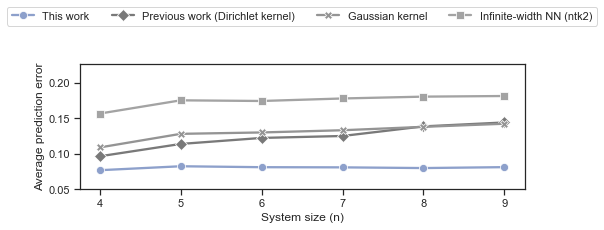

In [46]:
fig=plt.figure(figsize=(8.3, 4.0))

# just consider ntk2 for now
dftemp = df[(df['dataname'] == "new") & (df['qubitdist'] == 1) & (df['nsamples_new'] == 150) & (df['shadowsize'] == 500) & ((df['method'] == 'dirichlet') | (df['method'] == 'gauss') | (df['method'] == 'ntk2') | (df['method'] == 'new'))]
display(dftemp.head())

sns.lineplot(
    data=dftemp,
    x='nrow',
    y='avg_test',
    hue='method',
    style='method',
    dashes=False,
    markers=['o', 'D', 'X', 's'],
    markersize=8.1,
    linewidth = 2.3,
    palette=[sns.color_palette("Set2")[2], sns.color_palette("muted")[7], sns.color_palette("colorblind")[7], sns.color_palette("bright")[7]]
)
plt.xlabel('System size (n)')
plt.ylabel('Average prediction error')
plt.xticks([4, 5, 6, 7, 8, 9])
plt.ylim(0.05, 0.227)
plt.legend([],[], frameon=False)
plt.legend(title='', labels=['This work', 'Previous work (Dirichlet kernel)', 'Gaussian kernel', r'Infinite-width NN (ntk2)'], ncol=4, bbox_to_anchor=(0.5, 1.5), loc='upper center')
plt.tight_layout()
plt.savefig('system-size-for-legend.png', dpi=300)


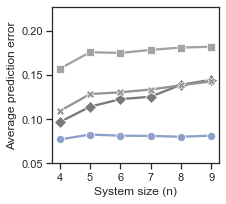

In [47]:
fig=plt.figure(figsize=(3.3, 3.0))

sns.lineplot(
    data=dftemp,
    x='nrow',
    y='avg_test',
    hue='method',
    style='method',
    dashes=False,
    markers=['o', 'D', 'X', 's'],
    markersize=8.1,
    linewidth = 2.3,
    palette=[sns.color_palette("Set2")[2], sns.color_palette("muted")[7], sns.color_palette("colorblind")[7], sns.color_palette("bright")[7]]
)

plt.xlabel('System size (n)')
plt.ylabel('Average prediction error')
plt.xticks([4, 5, 6, 7, 8, 9])
plt.ylim(0.05, 0.227)
plt.legend([],[], frameon=False)
plt.tight_layout()
plt.savefig('system-size.png', dpi=300)

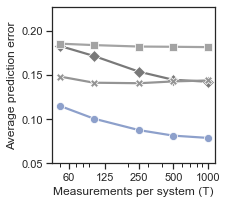

In [48]:
fig=plt.figure(figsize=(3.3, 3.0))

dftemp2 = df[(df['dataname'] == "new") & (df['nrow'] == 9) & (df['qubitdist'] == 1) & (df['nsamples_new'] == 150) & ((df['method'] == 'dirichlet') | (df['method'] == 'gauss') | (df['method'] == 'ntk2') | (df['method'] == 'new'))]

ax = sns.lineplot(
    data=dftemp2,
    x='shadowsize',
    y='avg_test',
    hue='method',
    style='method',
    markers=['o', 'D', 'X', 's'],
    dashes=False,
    markersize=8.1,
    linewidth = 2.2,
    palette=[sns.color_palette("Set2")[2], sns.color_palette("muted")[7], sns.color_palette("colorblind")[7], sns.color_palette("bright")[7]]
)
plt.xlabel(r'Measurements per system (T)')
plt.ylabel('Average prediction error')
plt.xscale('log')
plt.ylim(0.05, 0.227)
ax.set_xticks([60, 125, 250, 500, 1000])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.legend([],[], frameon=False)
plt.tight_layout()
plt.savefig('shadow-size.png', dpi=300)

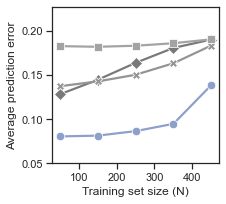

In [49]:
fig=plt.figure(figsize=(3.3, 3.0))

dftemp3 = df[(df['dataname'] == "new") & (df['nrow'] == 9) & (df['qubitdist'] == 1) & (df['shadowsize'] == 500) & ((df['method'] == 'dirichlet') | (df['method'] == 'gauss') | (df['method'] == 'ntk2') | (df['method'] == 'new'))]

sns.lineplot(
    data=dftemp3,
    x='nsamples_new',
    y='avg_test',
    hue='method',
    style='method',
    markers=['o', 'D', 'X', 's'],
    dashes=False,
    markersize=8.5,
    linewidth = 2.2,
    palette=[sns.color_palette("Set2")[2], sns.color_palette("muted")[7], sns.color_palette("colorblind")[7], sns.color_palette("bright")[7]]
)
plt.xlabel('Training set size (N)')
plt.ylabel('Average prediction error')
plt.ylim(0.05, 0.227)
plt.legend([],[], frameon=False)
plt.tight_layout()
plt.savefig('training-size.png', dpi=300)

In [44]:
%pdb on
def plot_local_region(length, width, test_size, shadow_size, data_name, d, root_dir, algo_name):
    # used to plot coefficients of Lasso for new algorithm on 2D grid to visualize local region found by algorithm

    q1 = 0
    q2 = 0
    
    pattern_fix = "array\((\[[ \d]+, [ \d]+\])\)" # need this pattern to fix coefficients files

    # all other files
    ####################################################
    # need to adapt 
    ####################################################
    f = open('./../{}/{}/test_size={}_shadow_size={}_qubits_d={}/coefficients_{}x{}_{}_data.txt'.format(root_dir, algo_name, test_size, shadow_size, d, length, width, data_name), 'r')
    for line in f:
        if line[0:1] == '(':
            q1, q2 = ast.literal_eval(line[11:-1])
        else:
            # since accidently we dont write out the edges as tuple but as array we need to fix that!
            line = re.sub(pattern_fix, r'\1', line)
            edge_and_coef = ast.literal_eval(line)
            coef = np.array(list(map(lambda x : x[1], edge_and_coef)))

            fig=plt.figure(figsize=(3.4*1.01, 3.0*1.01))
            
            G = nx.grid_2d_graph(length, width)

            pos = {(x, y) : (y, -x) for x, y in G.nodes()}
            node_to_int = {}
            for i in range(len(G.nodes())):
                (x, y) = list(G.nodes())[i]
                node_to_int[(x, y)] = i + 1

            edge_cmap = sns.color_palette("light:b", as_cmap=True)
            line_width = coef * 50 + 5
            edge_color = coef * 100
            vmin = min(edge_color)
            vmax = max(edge_color)

            # this is same order as all_edges in algorithm
            edges = list(map(lambda e : (node_to_int[e[0]], node_to_int[e[1]]), list(G.edges())))

            nx.draw_networkx_nodes(
                G,
                pos,
                node_color='#FFFFFF',
                edgecolors='#4B6392',
                linewidths=2.3,
                node_size=500)
            nx.draw_networkx_edges(
                G,
                pos,
                edge_cmap=edge_cmap,
                width=line_width,
                edge_color=edge_color,
                edge_vmin=vmin,
                edge_vmax=vmax)

            nx.draw_networkx_labels(
                G,
                pos,
                labels=node_to_int,
                font_color='#314A7B',
                font_family='avenir',
                verticalalignment='center_baseline')

            # creating colorbar
            sm = plt.cm.ScalarMappable(cmap=edge_cmap, norm=plt.Normalize(vmin=vmin/100, vmax=vmax/100))
            sm._A = []
            plt.colorbar(sm)

            ax = plt.gca()
            ax.set_axis_off()
            ax.margins(0.10)

            plt.title('Visualizing ML for qubits {}, {}'.format(q1, q2), fontname='avenir')
 
            # for other plots
            new_dir = './local_region_plots/new_test_size={}_shadow_size={}_{}_data_qubits_d={}_{}x{}'.format(test_size, shadow_size, data_name, d, length, width)
            if not os.path.exists(new_dir):
                os.makedirs(new_dir)
            plt.tight_layout()
            plt.savefig('{}/q1={}_q2={}.png'.format(new_dir, q1, q2), dpi=300)
            plt.clf()
            plt.show()

    f.close()

Automatic pdb calling has been turned ON


In [45]:
# for plotting local region:
length = 5
width = 5
test_size = 0.5
shadow_size = 1000
data_name = 'new'
root_dir = 'clean_results/clean_results300'
algo_name = [s for s in selection if s.startswith('new')][0]
d = 1
plot_local_region(length, width, test_size, shadow_size, data_name, d, root_dir, algo_name)

<Figure size 247.248x218.16 with 0 Axes>

<Figure size 247.248x218.16 with 0 Axes>

<Figure size 247.248x218.16 with 0 Axes>

<Figure size 247.248x218.16 with 0 Axes>

<Figure size 247.248x218.16 with 0 Axes>

<Figure size 247.248x218.16 with 0 Axes>

<Figure size 247.248x218.16 with 0 Axes>

<Figure size 247.248x218.16 with 0 Axes>

<Figure size 247.248x218.16 with 0 Axes>

<Figure size 247.248x218.16 with 0 Axes>

<Figure size 247.248x218.16 with 0 Axes>

<Figure size 247.248x218.16 with 0 Axes>

<Figure size 247.248x218.16 with 0 Axes>

<Figure size 247.248x218.16 with 0 Axes>

<Figure size 247.248x218.16 with 0 Axes>

<Figure size 247.248x218.16 with 0 Axes>

<Figure size 247.248x218.16 with 0 Axes>

<Figure size 247.248x218.16 with 0 Axes>

<Figure size 247.248x218.16 with 0 Axes>

<Figure size 247.248x218.16 with 0 Axes>

<Figure size 247.248x218.16 with 0 Axes>

<Figure size 247.248x218.16 with 0 Axes>

<Figure size 247.248x218.16 with 0 Axes>

<Figure size 247.248x218.16 with 0 Axes>

<Figure size 247.248x218.16 with 0 Axes>

<Figure size 247.248x218.16 with 0 Axes>

<Figure size 247.248x218.16 with 0 Axes>

<Figure size 247.248x218.16 with 0 Axes>

<Figure size 247.248x218.16 with 0 Axes>

<Figure size 247.248x218.16 with 0 Axes>

<Figure size 247.248x218.16 with 0 Axes>

<Figure size 247.248x218.16 with 0 Axes>

<Figure size 247.248x218.16 with 0 Axes>

<Figure size 247.248x218.16 with 0 Axes>

<Figure size 247.248x218.16 with 0 Axes>

<Figure size 247.248x218.16 with 0 Axes>

<Figure size 247.248x218.16 with 0 Axes>

<Figure size 247.248x218.16 with 0 Axes>

<Figure size 247.248x218.16 with 0 Axes>

<Figure size 247.248x218.16 with 0 Axes>